In [20]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(os.path.join("..")))

The follow runs are for BCE loss with varying embed dims.

In [21]:
run = "logs/train/runs/32_dims_C16_M32"

In [22]:
metrics = f"D:\\felix-ml\\{run}\\csv\\version_0\\metrics.csv"
df = pd.read_csv(metrics)

In [23]:
df2 = df[~df["epoch"].isna()]
df2 = df2.drop(["step", "train/loss_MSE_step", "train/loss_MS_SSIM_step", "train/loss_BCE_step"], axis=1)
dfm = df2.melt("epoch", var_name="cols", value_name="loss")
dfm = dfm[~dfm["loss"].isna()]

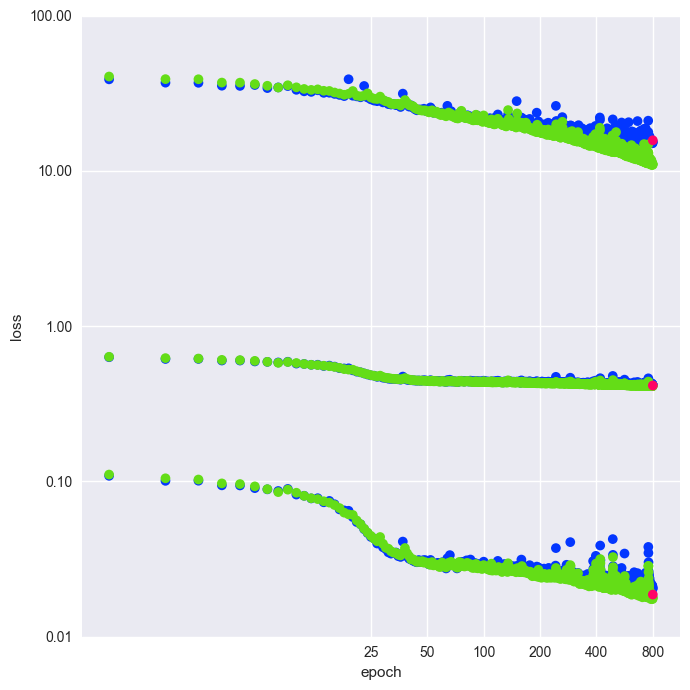

In [41]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

palette = ["#A6CEE3", "#1F78B4", "#B15928", "#B2DF8A", "#33A02C", "#FF7F00", "#FB9A99", "#E21A1B", "#6A3D9A"]
palette = ["#64DD17", "#0336FF", "#FF0266",
           "#64DD17", "#0336FF", "#FF0266",
           "#64DD17", "#0336FF", "#FF0266"]
markers = {'train/loss_MS_SSIM_epoch': "s"}#, "s", "o", "^", "s", "o", "^", "s", "o"]


g = sns.scatterplot(data=dfm, x="epoch", y="loss", ax=ax, markers=markers, hue="cols", hue_order=
    ['train/loss_MS_SSIM_epoch', 'val/loss_MS_SSIM', 'test/loss_MS_SSIM',
     'train/loss_BCE_epoch', 'val/loss_BCE', 'test/loss_BCE',
     'train/loss_MSE_epoch', 'val/loss_MSE', 'test/loss_MSE'],
    palette=palette, linewidth=0
    
)
ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xticks([25, 50, 100, 200, 400, 800])
ax.set_yticks([0.01, 0.10, 1.00, 10.00, 100.0])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_legend().remove()
# handles, labels = g.get_legend_handles_labels()
# order = list(range(9))
# labels = [
#     "train (MS-SSIM)",
#     "validation (MS-SSIM)",
#     "test (MS-SSIM)",
#     "train (BCE)",
#     "validation (BCE)",
#      "test (BCE)",
#     "train (MSE)",
#     "validation (MSE)",
#     "test (MSE)",
# ]

# g.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

plt.tight_layout()
plt.show()